In [1]:
from cm1.io import load_era5, to_sounding_txt
from cm1.skewt import skewt
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
valid_time = pd.to_datetime("20231225")
ds0 = load_era5(valid_time, campaign=True, model_levels=True)
ds0

<xarray.Dataset> Size: 4GB
Dimensions:    (latitude: 640, level: 137, longitude: 1280)
Coordinates:
  * latitude   (latitude) float64 5kB 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * level      (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * longitude  (longitude) float64 10kB 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
    time       datetime64[ns] 8B 2023-12-25
Data variables: (12/13)
    Q          (level, latitude, longitude) float32 449MB <Quantity(dask.arra...
    a_model    (level) float64 1kB <Quantity(dask.array<where, shape=(137,), ...
    b_model    (level) float64 1kB <Quantity(dask.array<where, shape=(137,), ...
    weight     (latitude) float64 5kB <Quantity(dask.array<where, shape=(640,...
    SP         (latitude, longitude) float32 3MB <Quantity(dask.array<getitem...
    T          (level, latitude, longitude) float32 449MB <Quantity(dask.arra...
    ...         ...
    V          (level, latitude, longitude) float32 449MB <Quantity(dask.arra...
    W          (level, latitude, longitude) float32 449MB <Quantity(dask.arra...
    P          (level, latitude, longitude) float64 898MB <Quantity(dask.arra...
    Zsfc       (latitude, longitude) float32 3MB <Quantity([[ 5.61217368e-01 ...
    Tv         (level, latitude, longitude) float32 449MB <Quantity(dask.arra...
    Z          (level, latitude, longitude) float64 898MB <Quantity(dask.arra...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    casper node employed: Linux crhtc...
    CONVERSION_AND_COMPRSSION_DATE:         Fri 10 May 2024 08:39:16 PM MDT
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Fri May 10 20:39:33 2024: ncks -4...
    NCO:                                    netCDF Operators version 5.1.9 (H...

/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/cm1/skewt.py:229: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


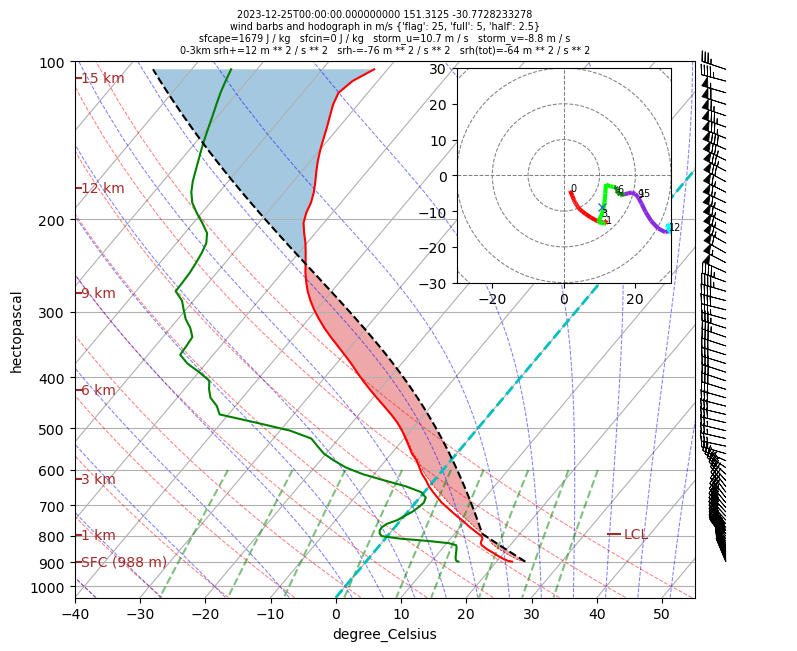

In [14]:
longitude = 151.2
latitude = -30.8
ds = ds0.sel(longitude=longitude, latitude=latitude, method="nearest")
fig = plt.figure(figsize=(8,8))
skewt(ds, fig=fig)

/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/cm1/skewt.py:229: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/cm1/skewt.py:229: UserWarning: Interpolation point out of data bounds encountered
  (agl2p,) = interpolate_1d(label_hgt, agl, p)


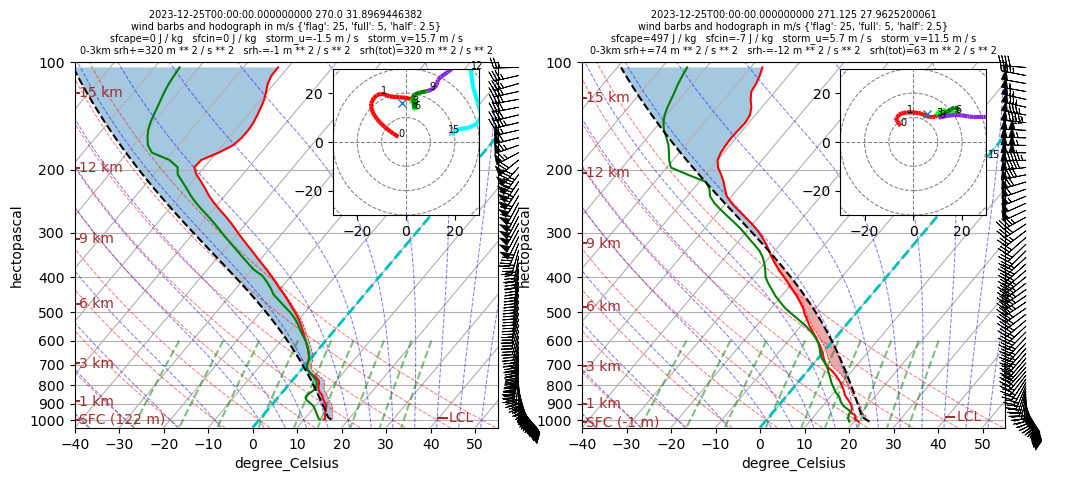

In [ ]:
locs = [(270, 32), (271, 28)]

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Initialize SkewT for each subplot
for index, (longitude, latitude) in enumerate(locs):
    ds = ds0.sel(longitude = longitude, latitude=latitude, method="nearest")
    skew = skewt(ds, fig=fig, subplot=(1,2,index+1))

In [11]:
ofile = "t.csv"
with open(ofile, "w") as f:
    f.write(to_sounding_txt(ds))

In [12]:
pd.read_csv(ofile, skiprows=1, sep=" ", names=["z", "theta", "q", "u", "v"])

,z,theta,q,u,v
0,9.334471,293.296407,13.777171,-5.196335,6.587040
1,30.909773,293.323117,13.674336,-5.607468,7.102190
2,54.533566,293.367795,13.605601,-5.853977,7.420517
3,80.387908,293.381291,13.567305,-6.070673,7.728668
4,108.668546,293.367550,13.535659,-6.285305,8.059092
...,...,...,...,...,...
132,64440.503332,3256.200910,0.003704,42.190117,14.826115
133,66780.433149,3475.925483,0.003364,38.589058,5.430328
134,69186.370545,3729.524385,0.003030,33.084213,-2.190094
135,71683.504548,4103.969032,0.002374,23.660606,2.200439


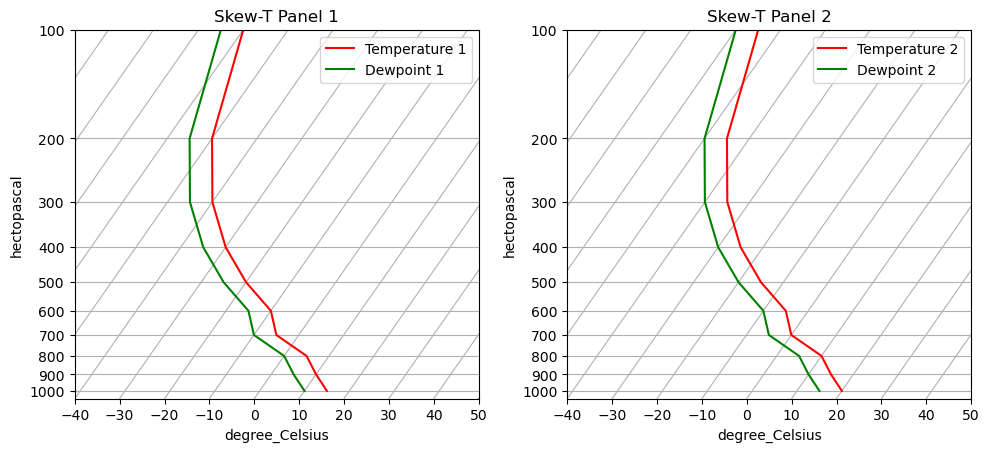

In [13]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import numpy as np

# Example data
pressure = np.array([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]) * units.hPa
temperature1 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC
temperature2 = np.array([20, 15, 10, 0, -5, -15, -25, -35, -45, -55]) * units.degC
dewpoint1 = np.array([10, 5, 0, -10, -15, -25, -35, -45, -55, -65]) * units.degC
dewpoint2 = np.array([15, 10, 5, -5, -10, -20, -30, -40, -50, -60]) * units.degC

# Create figure with two subplots side by side
fig =  plt.figure(figsize=(10, 8))

# First Skew-T plot
skew1 = SkewT(fig, subplot=(1,2,1), rotation=35)
skew1.plot(pressure, temperature1, 'r', label='Temperature 1')
skew1.plot(pressure, dewpoint1, 'g', label='Dewpoint 1')
skew1.ax.set_title('Skew-T Panel 1')
skew1.ax.legend()

# Second Skew-T plot
skew2 = SkewT(fig, subplot=(1,2,2), rotation=35)
skew2.plot(pressure, temperature2, 'r', label='Temperature 2')
skew2.plot(pressure, dewpoint2, 'g', label='Dewpoint 2')
skew2.ax.set_title('Skew-T Panel 2')
skew2.ax.legend()

plt.tight_layout()
plt.show()
